## OX_classification

In [4]:
from glob import glob

In [5]:
train_raw_0_list = glob('./train_raw/O/*')

In [6]:
train_raw_0_list

['./train_raw/O\\o.5.png',
 './train_raw/O\\o.6 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.6 - 복사본 - 복사본.png',
 './train_raw/O\\o.6 - 복사본.png',
 './train_raw/O\\o.6.png',
 './train_raw/O\\o.lastnew1 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew1 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew1 - 복사본.png',
 './train_raw/O\\o.lastnew1.png',
 './train_raw/O\\o.lastnew2 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew2 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew2 - 복사본.png',
 './train_raw/O\\o.lastnew2.png',
 './train_raw/O\\o.lastnew3 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew3 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew3 - 복사본.png',
 './train_raw/O\\o.lastnew3.png',
 './train_raw/O\\o.lastnew4 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew4 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew4 - 복사본.png',
 './train_raw/O\\o.lastnew4.png',
 './train_raw/O\\o.lastnew5 - 복사본 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew5 - 복사본 - 복사본.png',
 './train_raw/O\\o.lastnew5 - 복사본.png',
 '.

###  OpenCV를 사용해도 되지만, 이번에는 skimage

In [42]:
from skimage.transform import rescale, resize
from skimage import io, color
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

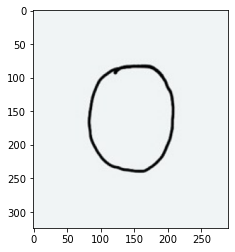

In [45]:
image = imread(train_raw_0_list[0])
plt.imshow(image, cmap='gray');

### resize

(28, 28, 4)


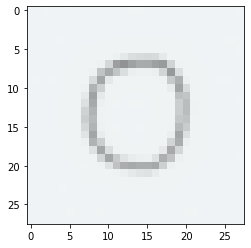

In [46]:
img_resized = resize(image, (28, 28))
print(img_resized.shape)
plt.imshow(img_resized, cmap='gray');

### 저장하기

In [47]:
import numpy as np

imsave('./tmp.png', np.round(img_resized*255).astype(np.uint8))

### 다시 확인

(28, 28, 4)


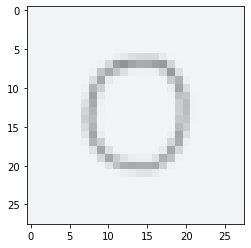

In [49]:
tmp = imread('./tmp.png')
print(tmp.shape)
plt.imshow(tmp, cmap='gray');

### 파일이름 추출 연습

In [51]:
train_raw_0_list[0].split('\\')[-1][:-4]

'o.5'

### 이미지 resize 함수 생성

In [52]:
def img_resize(img):
    return resize(img, (28, 28))

### train_O

In [57]:
from tqdm.notebook import tqdm

def convert_train_O():
    train_raw_0_list = glob('./train_raw/O/*')
    for each in tqdm(train_raw_0_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './train/O/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_O()

  0%|          | 0/77 [00:00<?, ?it/s]

### train_X

In [58]:
from tqdm.notebook import tqdm

def convert_train_X():
    train_raw_X_list = glob('./train_raw/X/*')
    for each in tqdm(train_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './train/X/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_X()

  0%|          | 0/77 [00:00<?, ?it/s]

### test_O

In [65]:
from tqdm.notebook import tqdm

def convert_test_O():
    test_raw_0_list = glob('./test_raw/O/*')
    for each in tqdm(test_raw_0_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './test/O/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_test_O()

  0%|          | 0/19 [00:00<?, ?it/s]

### test_X

In [66]:
from tqdm.notebook import tqdm

def convert_test_X():
    test_raw_X_list = glob('./test_raw/X/*')
    for each in tqdm(test_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './test/X/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_test_X()

  0%|          | 0/19 [00:00<?, ?it/s]

### 모듈 import

In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras

np.random.seed(13)

### image_generator

In [68]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./train',
                                                   target_size=(28, 28),
                                                   batch_size=3,
                                                   class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./test',
                                                 target_size=(28, 28),
                                                 batch_size=3,
                                                 class_mode='categorical')

Found 154 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


### 모델 구성

In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # binary일때, softmax = sigmoid

### compile

In [70]:
model.compile(loss='categorical_crossentropy', # multi-class -> sparse
             optimizer='adam', metrics=['accuracy'])

### fit

In [71]:
hist = model.fit_generator(train_generator,
                          steps_per_epoch=15,
                          epochs=50,
                          validation_data=test_generator,
                          validation_steps=5)

C:\Users\seonwook\AppData\Local\Temp/ipykernel_294552/540860592.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 1.1941 - accuracy: 0.4889 - val_loss: 0.6918 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.6811 - accuracy: 0.6047 - val_loss: 0.7118 - val_accuracy: 0.4667
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.6741 - accuracy: 0.6000 - val_loss: 0.7075 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6759 - accuracy: 0.6000 - val_loss: 0.6482 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6666 - accuracy: 0.7556 - val_loss: 0.6068 - val_accuracy: 0.5333
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6124 - accuracy: 0.8667 - val_loss: 0.6459 - val_accuracy: 0.4667
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4507 - accuracy: 0.8000 - val_loss: 0.3906 - val_accuracy: 0.8000
Epoch 8/50
15/

### 학습 상황 시각화

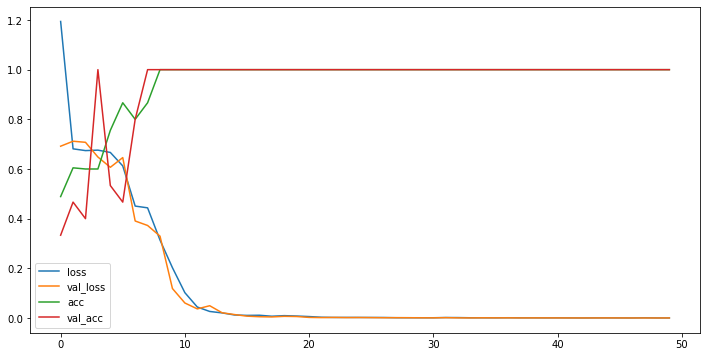

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()